Class 11: API

#vamos a usar esta url como ejemplo https://open-meteo.com/
#curl es un comando de bash que se comunica con una url, si pongo curl + url entre comillas junto con los argumentos; la url de abajo trae la dirección, después trae latitud y otras cosas que son los argumentos, abajo el ejemplo.  

--curl "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m"
lo pego en la terminal de bash y lo corro y me da los datos. 

-- los datos los da en formato json que es parecido a un diccionario python. se puede traducir a un diccionario. 
-- se debe instalar las siguientes liberias: python -m pip install python-dotenv langchain-groq
-- la primera para leer archivo oculto .env que es donde guardo mis llaves
-- la segunda es un framework para trabajar con https://groq.com/


In [70]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
# las variables de entorno (archivos .evn) estan en un archivo oculto con esta libreria lo puedo lelerr
from dotenv import load_dotenv
from langchain_groq import ChatGroq
# libreria que se comunica con el sistema operativo
import os

In [71]:
#crear un diccionario con nombre, apellido_paterno, num_hermanos
diccionario = {'nombre':'enrique',
               'apellido_paterno':'ramirez',
               'num_hermanos':'0',
               'hoobies':['leer','nadar','peliculas','musica']} #las llaves de la lista [] no se repiten, toda la lista va en las llaves.
print(diccionario)

{'nombre': 'enrique', 'apellido_paterno': 'ramirez', 'num_hermanos': '0', 'hoobies': ['leer', 'nadar', 'peliculas', 'musica']}


In [72]:
#La función json.dumps() convierte un diccionario de Python (u otros objetos como listas) a una cadena en formato JSON. 
# Esto es útil cuando necesitas almacenar o transmitir datos en formato JSON.
json.dumps(diccionario)

'{"nombre": "enrique", "apellido_paterno": "ramirez", "num_hermanos": "0", "hoobies": ["leer", "nadar", "peliculas", "musica"]}'

In [73]:
#sort_keys=True ordena las entradas del diccionario
json.dumps(diccionario, sort_keys=True)

'{"apellido_paterno": "ramirez", "hoobies": ["leer", "nadar", "peliculas", "musica"], "nombre": "enrique", "num_hermanos": "0"}'

In [74]:
#la funcion jason.loads convierte de diccionario de Python a formato JSON
result = '{"nombre":"john","apellido_paterno":"connor","num_hermanos":"0"}'
result_dict = json.loads(result)
result_dict

{'nombre': 'john', 'apellido_paterno': 'connor', 'num_hermanos': '0'}

In [75]:
#definir la url
url = 'https://api.open-meteo.com/v1/forecast'

#parametros de la url los saco de correr el codigo de explorar url en la terminal. los numeros despues del : van sin comilla
parametros = {
    "latitude":52.52,
    "longitude":13.41,
    "current":"temperature_2m,wind_speed_10m",
    "hourly":"temperature_2m,relative_humidity_2m,wind_speed_10m"
}

In [76]:
#defino variable api_call, y le pido co la funcion request.get y las variables url y parametros
#la sintaxis de requests.get(variable con la url, parametros de la url= a la variable con los parametros)

api_call = requests.get(url,params=parametros)
api_call

<Response [200]>

In [77]:
#si la api call = 200 (o sea ok) voy a crear una variable data en formato json y la voy a imprimir 
if api_call.status_code == 200:
    data = api_call.json()
    print(data)

#si no funciona si no voy a imprimir el codigo de error con {}
else:
    print(f'Failed:{api_call.status_code}')

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.15985965728759766, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C', 'wind_speed_10m': 'km/h'}, 'current': {'time': '2025-02-04T20:30', 'interval': 900, 'temperature_2m': -0.4, 'wind_speed_10m': 4.7}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%', 'wind_speed_10m': 'km/h'}, 'hourly': {'time': ['2025-02-04T00:00', '2025-02-04T01:00', '2025-02-04T02:00', '2025-02-04T03:00', '2025-02-04T04:00', '2025-02-04T05:00', '2025-02-04T06:00', '2025-02-04T07:00', '2025-02-04T08:00', '2025-02-04T09:00', '2025-02-04T10:00', '2025-02-04T11:00', '2025-02-04T12:00', '2025-02-04T13:00', '2025-02-04T14:00', '2025-02-04T15:00', '2025-02-04T16:00', '2025-02-04T17:00', '2025-02-04T18:00', '2025-02-04T19:00', '2025-02-04T20:00', '2025-02-04T21:00', '2025-02-04T22:00', '2025-0

In [78]:
#type nos devulve el tipo de datos que tenemos y data es mi variable que declare arriba

type(data)

dict

In [79]:
#Traemos la llave "latitud" 
data["latitude"]

52.52

In [80]:
data["hourly"]

{'time': ['2025-02-04T00:00',
  '2025-02-04T01:00',
  '2025-02-04T02:00',
  '2025-02-04T03:00',
  '2025-02-04T04:00',
  '2025-02-04T05:00',
  '2025-02-04T06:00',
  '2025-02-04T07:00',
  '2025-02-04T08:00',
  '2025-02-04T09:00',
  '2025-02-04T10:00',
  '2025-02-04T11:00',
  '2025-02-04T12:00',
  '2025-02-04T13:00',
  '2025-02-04T14:00',
  '2025-02-04T15:00',
  '2025-02-04T16:00',
  '2025-02-04T17:00',
  '2025-02-04T18:00',
  '2025-02-04T19:00',
  '2025-02-04T20:00',
  '2025-02-04T21:00',
  '2025-02-04T22:00',
  '2025-02-04T23:00',
  '2025-02-05T00:00',
  '2025-02-05T01:00',
  '2025-02-05T02:00',
  '2025-02-05T03:00',
  '2025-02-05T04:00',
  '2025-02-05T05:00',
  '2025-02-05T06:00',
  '2025-02-05T07:00',
  '2025-02-05T08:00',
  '2025-02-05T09:00',
  '2025-02-05T10:00',
  '2025-02-05T11:00',
  '2025-02-05T12:00',
  '2025-02-05T13:00',
  '2025-02-05T14:00',
  '2025-02-05T15:00',
  '2025-02-05T16:00',
  '2025-02-05T17:00',
  '2025-02-05T18:00',
  '2025-02-05T19:00',
  '2025-02-05T20:00',
  

In [81]:
df = pd.DataFrame(data["hourly"])
df

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-02-04T00:00,-1.9,86,4.7
1,2025-02-04T01:00,-2.1,88,3.2
2,2025-02-04T02:00,-2.3,92,4.0
3,2025-02-04T03:00,-2.8,92,3.9
4,2025-02-04T04:00,-3.1,93,4.3
...,...,...,...,...
163,2025-02-10T19:00,-0.8,66,12.6
164,2025-02-10T20:00,-1.1,64,13.0
165,2025-02-10T21:00,-1.5,64,13.0
166,2025-02-10T22:00,-1.9,65,13.0


In [82]:
#para poder graficar el dataframe debo primero convertir la col de la izquierda al formato de fecha hora correcto
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,temperature_2m,relative_humidity_2m,wind_speed_10m
0,2025-02-04 00:00:00,-1.9,86,4.7
1,2025-02-04 01:00:00,-2.1,88,3.2
2,2025-02-04 02:00:00,-2.3,92,4.0
3,2025-02-04 03:00:00,-2.8,92,3.9
4,2025-02-04 04:00:00,-3.1,93,4.3


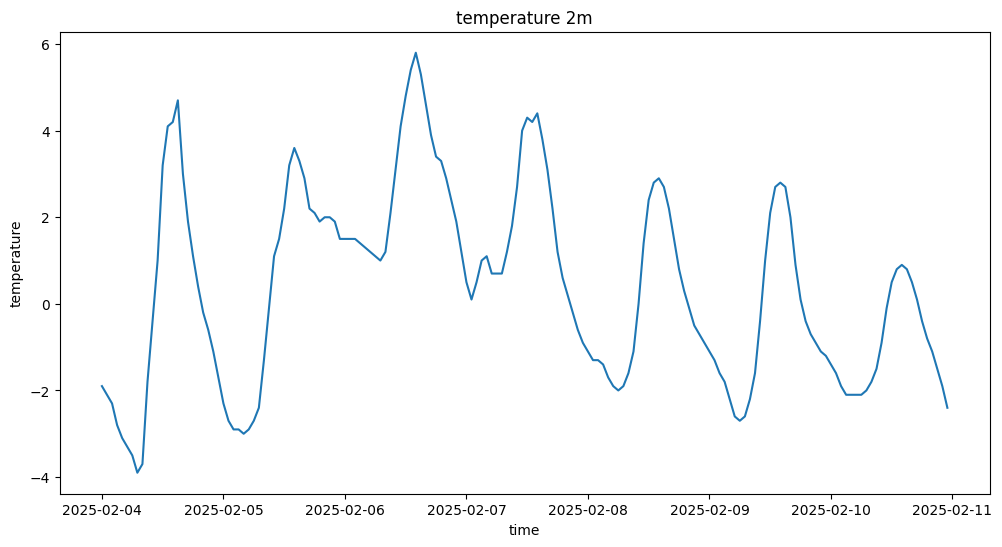

In [83]:
# ya podemos graficar con 
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['temperature_2m'])
plt.title('temperature 2m')
plt.xlabel('time')
plt.ylabel('temperature')
plt.show()

In [84]:
#vamos a cargar el contenido del archivo .evn que en este caso trae mi api key
load_dotenv()

True

In [85]:
llm = ChatGroq(model_name="llama3-8b-8192")

In [86]:
mensaje = [
    ("system","you are a helpful asistant that translates english to spanish. translate the user sentence"),
    ("human", "I love programming")
]

In [87]:
msg_llm = llm.invoke(mensaje)
print(msg_llm)

content='Me encanta programar.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 34, 'total_tokens': 41, 'completion_time': 0.005833333, 'prompt_time': 0.004053946, 'queue_time': 0.020816874, 'total_time': 0.009887279}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None} id='run-f548908c-3324-4925-8885-530bf1b8109e-0' usage_metadata={'input_tokens': 34, 'output_tokens': 7, 'total_tokens': 41}


In [88]:
#api endpoint URL
url = "https://api.groq.com/openai/v1/chat/completions" #API endpoint
api_key = os.getenv("GROQ_API_KEY")
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

data = {
    "model": "llama3-8b-8192",
    "messages": [
        {
            "role": "user",
            "content": "Who are the Beatles?"
        }
    ]
}
response = requests.post(url, headers=headers, json=data)
response

<Response [200]>

In [96]:
response_data = response.json()
print(response_data)




{'id': 'chatcmpl-733a34ef-5ba9-4c25-9bcb-8f0ef195df12', 'object': 'chat.completion', 'created': 1738701850, 'model': 'llama3-8b-8192', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'The Beatles are one of the most influential and successful rock bands of all time. They were a British band formed in Liverpool in 1960, consisting of four members:\n\n1. John Lennon (1940-1980) - rhythm guitar, keyboards, harmonica, and vocals\n2. Paul McCartney (born 1942) - bass guitar, piano, and vocals\n3. George Harrison (1943-2001) - lead guitar, keyboards, and vocals\n4. Ringo Starr (born 1940) - drums and percussion\n\nThe Beatles are known for their innovative music, songwriting, and cultural impact. They are widely regarded as one of the most influential and successful bands in the history of popular music.\n\nThe Beatles\' music career spanned over a decade, from 1960 to 1970. During this time, they released numerous albums and singles, many of which became iconic and endu